**Задание**

**Цель**: Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.


**Описание задания:**

В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с [сайта](https://www.kaggle.com/uciml/glass). Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

**Этапы работы**:

Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
Проведите первичный анализ.

а) Проверьте количество записей для каждого класса. Сделайте вывод.

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

Обучите модель дерева решений [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) на обучающем множестве.
Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

Обработайте выбросы в данных.

а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции [sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html), [sns.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html). Есть ли признаки с нормальным распределением?

b) Исследуйте признаки на выбросы несколькими способами.

c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

Повторите п. 4, п. 5.

Сформулируйте выводы по проделанной работе.

а) Кратко опишите, какие преобразования были сделаны с данными.

b) Сравните точность двух моделей.

c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.

**Результат**:

Получены практические знания по работе с выбросами в данных.

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
Проведите первичный анализ.

а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [52]:
df = pd.read_csv('glass.csv')
df.shape

(214, 10)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [54]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [55]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [56]:
for i in df['Type'].unique():
  print('класс = ', i, 'количество записей =  ', len(df[df.Type == i]))

класс =  1 количество записей =   70
класс =  2 количество записей =   76
класс =  3 количество записей =   17
класс =  5 количество записей =   13
класс =  6 количество записей =   9
класс =  7 количество записей =   29



Вывод - в датафрейме представлены 214 записей для 6 видов стекла, пропусков нет. Каждый вид стекла - принимаем как класс

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [57]:
def get_accuracy(X,y, random_seed=100, model=None, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    if model is None:
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

In [58]:

X = df.loc[:, df.columns != "Type"]
y = df[["Type"]].values.ravel()

In [59]:
Acc1 = get_accuracy(X, y)
Acc1

0.813953488372093

Обработайте выбросы в данных.

а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

b) Исследуйте признаки на выбросы несколькими способами.

c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

Повторите п. 4, п. 5.

In [60]:
def get_boxplot(X, columns=[]):
    for i in columns:
        plt.figure(figsize=(15,5))
        sns.boxplot(x=X[i])
        plt.show()
    pass

In [61]:
def get_displot(X, columns=[]):
    for i in columns:
        plt.figure(figsize=(15,5))
        sns.displot(x=X[i])
        plt.show()
    pass

<Figure size 1080x360 with 0 Axes>

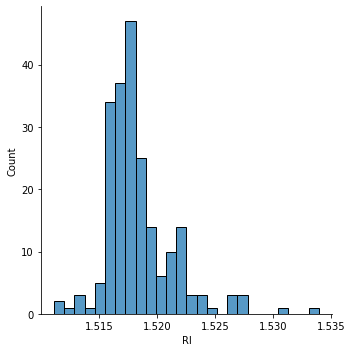

<Figure size 1080x360 with 0 Axes>

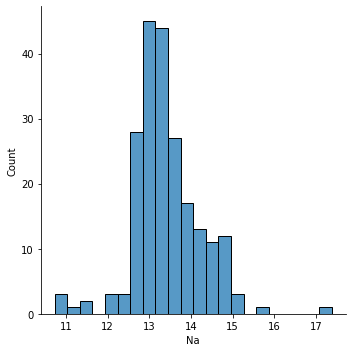

<Figure size 1080x360 with 0 Axes>

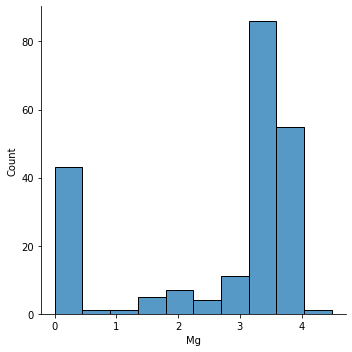

<Figure size 1080x360 with 0 Axes>

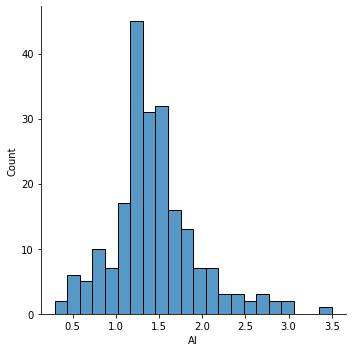

<Figure size 1080x360 with 0 Axes>

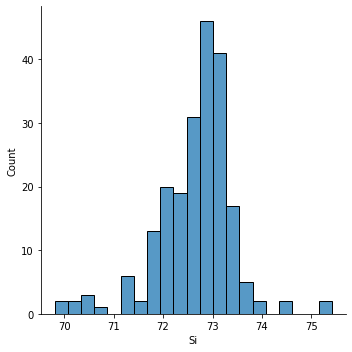

<Figure size 1080x360 with 0 Axes>

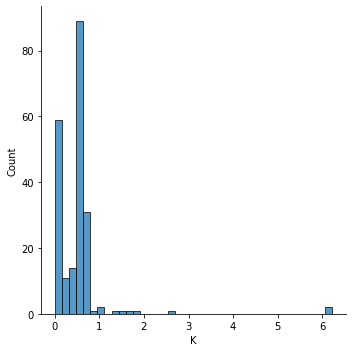

<Figure size 1080x360 with 0 Axes>

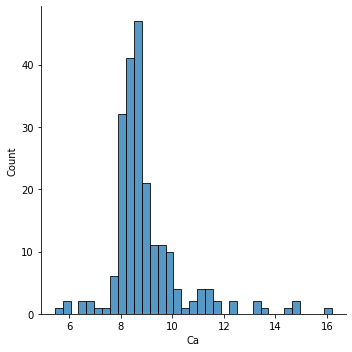

<Figure size 1080x360 with 0 Axes>

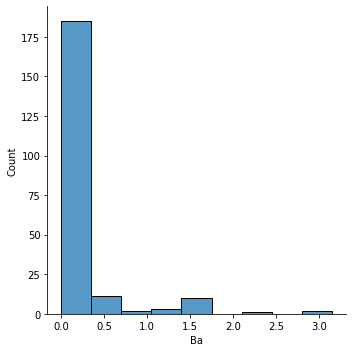

<Figure size 1080x360 with 0 Axes>

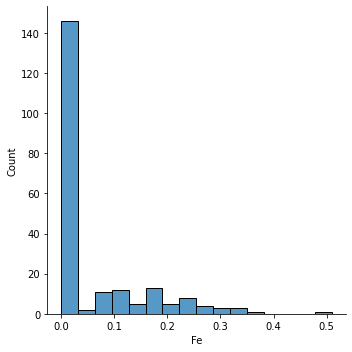

In [62]:
get_displot(df, np.array(X.columns))

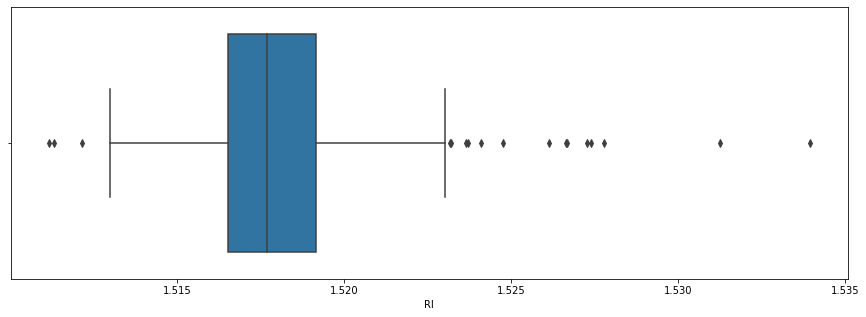

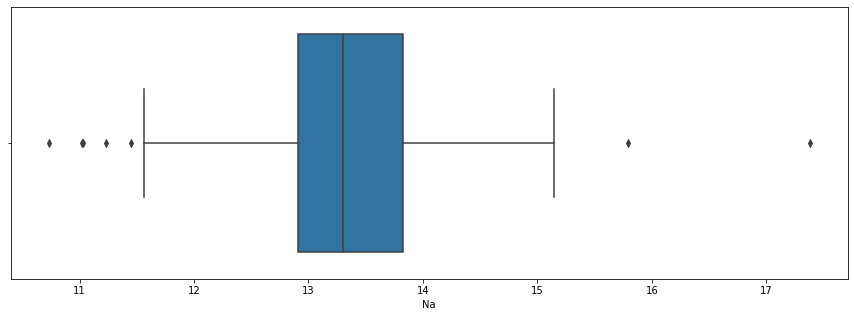

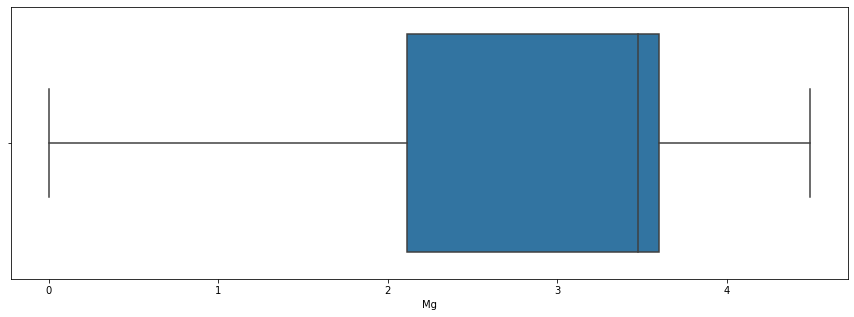

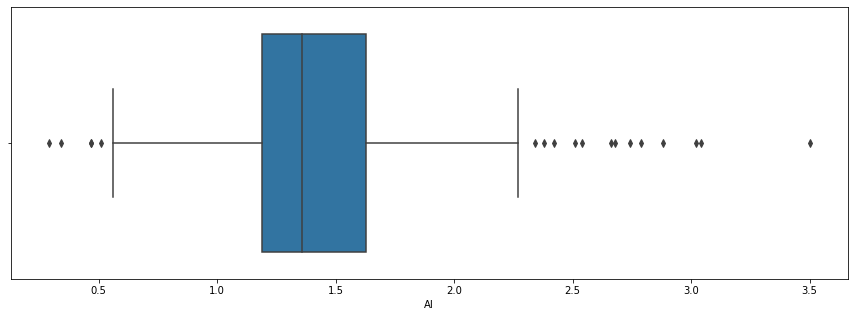

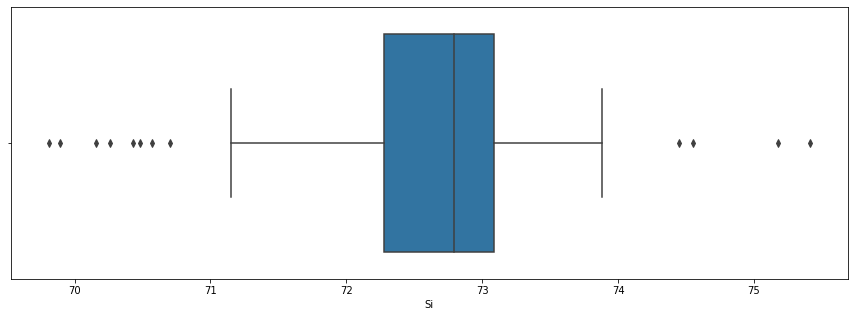

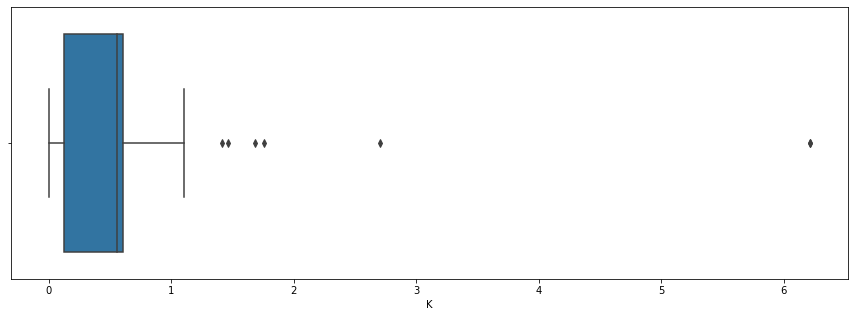

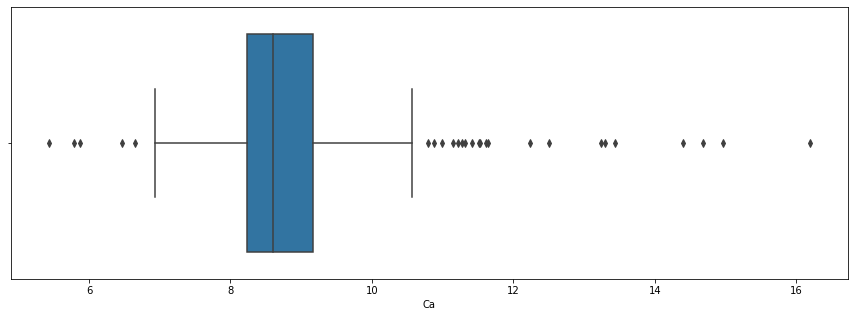

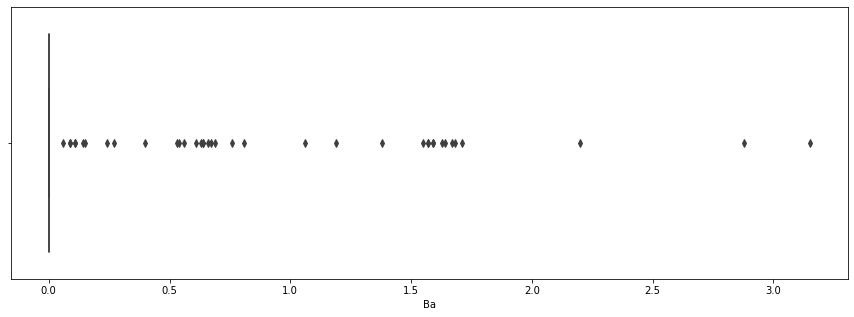

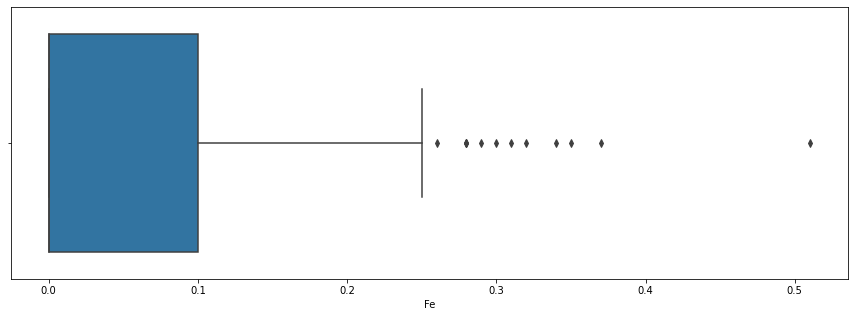

In [63]:
get_boxplot(df, np.array(X.columns))

Только несколько признаков имеют распределение, очень издалека напоминающие нормальное (хотя оно не нормальное в принципе) - RI, Na, Al, Si, Ca Можно попытаться удалить выбросы для части признаков - RI, Na, Al, Si, Ca, K, Fe. По Mg выбросов нет, по Ba - выбросы не определяются, так как распределение очень далекое от нормального.

In [64]:
v = df[df['RI'] < df['RI'].quantile(0.75)]
v

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [65]:
q1 = df['RI'].quantile(0.25)
q3 = df['RI'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['RI'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [66]:
def out_liers():
  q1 = df['RI'].quantile(0.25)
  q3 = df['RI'].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr) 
  upper_bound = q3 + (1.5 * iqr)

  return (lower_bound, upper_bound)

In [67]:
def uB(col):
  q1 = col.quantile(0.25)
  q3 = col.quantile(0.75)
  iqr = q3 - q1
   
  upper_bound = q3 + (1.5 * iqr)

  return upper_bound

In [68]:
def lB(col):
  q1 = col.quantile(0.25)
  q3 = col.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr) 

  return lower_bound

In [69]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [70]:

df_2 = df[
    (df['RI'].between(lB(df['RI']), uB(df['RI']), inclusive=True)) &
    (df['Na'].between(lB(df['Na']), uB(df['Na']), inclusive=True)) &
    (df['Al'].between(lB(df['Al']), uB(df['Al']), inclusive=True)) &
    (df['Si'].between(lB(df['Si']), uB(df['Si']), inclusive=True)) &
    (df['K'].between(lB(df['K']), uB(df['K']), inclusive=True)) &
    (df['Ca'].between(lB(df['Ca']), uB(df['Ca']), inclusive=True)) &
    (df['Fe'].between(lB(df['Fe']), uB(df['Fe']), inclusive=True))
]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


In [71]:
df_2.shape

(157, 10)

Получился датафрейм на 157 записи вместо 214 . Процент удаленных записей для каждого класса:

In [72]:
for i in df['Type'].unique():
  print('класс = ', i, 'Процент удаленных записей =  ', round(100 * (len(df[df.Type == i]) - len(df_2[df_2.Type == i]))/len(df[df.Type == i])))

класс =  1 Процент удаленных записей =   11
класс =  2 Процент удаленных записей =   21
класс =  3 Процент удаленных записей =   6
класс =  5 Процент удаленных записей =   85
класс =  6 Процент удаленных записей =   44
класс =  7 Процент удаленных записей =   59



Моделирование после удаления предполагаемых выбросов

In [73]:
X2 = df_2.loc[:, df_2.columns != "Type"]
y2 = df_2[["Type"]].values.ravel()

Acc2 = get_accuracy(X2, y2)
Acc2

0.84375

In [74]:
Acc1

0.813953488372093

In [75]:
Acc1<Acc2

True

Сформулируйте выводы по проделанной работе.
а) Кратко опишите, какие преобразования были сделаны с данными.

b) Сравните точность двух моделей.

c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

Данные загружались в датафрейм из файла, делились на обучающую и тестовую выборки, использовались в модели для предсказания, затем были проанализированы на выбросы, очищены от выбросов и снова использовались в модели.

Аccuracy **исходной модели оказалась ниже**, чем после очистки от предполагаемых выбросов. 

Но запуская модель многократно получались совершенно разные результаты и чаще до очистки accuracy было лучше, но оставил такой результат, чтобы показать.

Вывод: Все модели - врут и что с этим делать не знаю. Подсказывайте.

Добрый день!

Спасибо за проделенную работу!

Проверьте количество записей для каждого класса еще можно было бы через valuecounts(): `df['Type'].valuecounts()`

Провели отличный визуальный анализ данных

Хорошо, что работали с выбросами через межквартильный размах

Результаты по моделям могли быть разными, потому что модель случайный лес, действительно, очень случайная и чтобы деревья при разных перезапусках были одинаковыми, а не каждый раз случайными, нужно фиксировать random_state любым целым значением в RandomForestClassifier()

Успехов!